# Individual Assignment 2 : Classification & Logistic Regression
(Total of 20 marks)

Instructions:
- You may work on this file directly, and fill in your answers/code below. Add more cells if necessary.
- For code cells, run your code and make sure the output is visible.
- Save the notebook as a HTML file (File > Download as > HTML) and **rename it with your student ID** (e.g. e01234567.html)
- Submit this to Canvas under Assignment 2

This assignment will require the following dataset:
- ```penguins.csv```

This dataset contains information about 3 species of penguins (Adelie, Gentoo, Chinstrap), recorded by the Palmer Station in Antarctica.  

We will train a logistic regression model to identify chinstrap penguins.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('penguins.csv', index_col = 0)
df

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
331,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


### 1. Compute (and display) the number of each species in the dataset. Is this a balanced or imbalanced dataset?
(1 mark)

In [2]:
print(df['species_short'].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species_short, dtype: int64


Answer: This is not a balanced dataset as we can see that the number of Adelie and Gentoo penguins are much more than Chinstrap penguins.

### 2. Use seaborn's ```pairplot``` to visualize the distribution of features across species. Based on the plot, answer questions 2(a), 2(b) and 2(c) below.
(4 marks)

Note: pairplot will only display numerical features; that's ok.

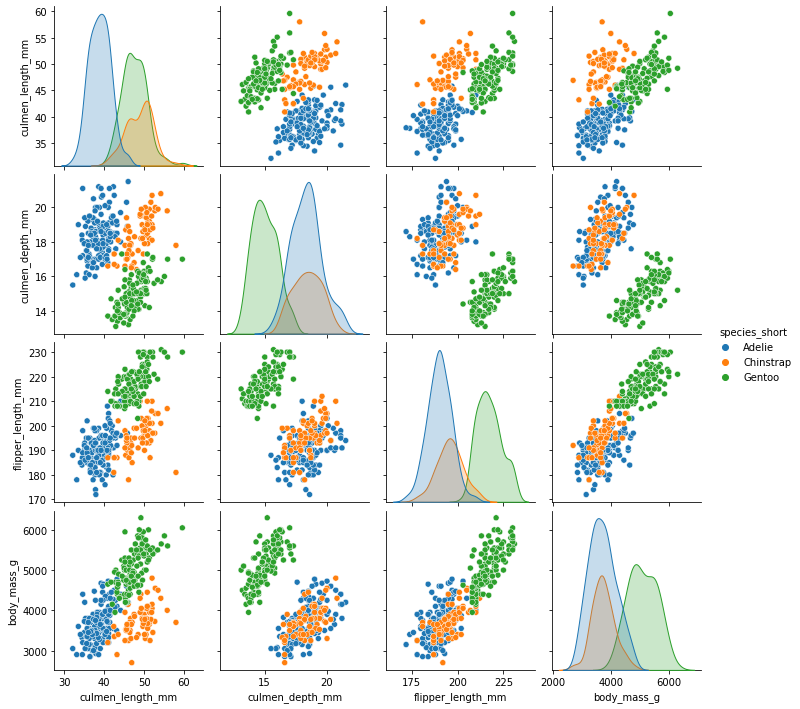

In [3]:
sns.pairplot(df, hue = 'species_short')

#### 2(a). Is there a _single_ feature that distinguishes _gentoo_ penguins from the rest? If so, what feature would you use? If not, explain why not.

Answer: There is no single feature that completely distinguishes Gentoo from the rest as there is some level of overlap between a feature of gentoo penguin and other species. However, the level of overlap between the flipper length of Gentoo and other penguins is much smaller than for other features and so, flipper length can be used for distinguishing gentoo penguins.

#### 2(b). Is there a _single_ feature that distinguishes _chinstrap_ penguins from the rest?  If so, what feature would you use? If not, explain why not.

Answer: There is no single feature that distinguishes chinstrap penguin from the rest as it almost completely overlaps with the features of other penguins

#### 2(c). Which 2 features would you use to distinguish chinstrap penguins from the rest?


Answer: Going through the pairplot, I would consider culmen_length_mm and body_mass_g as features to distinguish chinstrap penguins from the rest.

--- 

We will train logistic regression models on this data, and evaluate the performance. 

Throughout, we will set the target ```y``` to be ```True``` for chinstrap and ```False``` for others.

In [4]:
y = df['species_short'] == 'Chinstrap'
y

0      False
1      False
2      False
3      False
4      False
       ...  
328    False
329    False
330    False
331    False
332    False
Name: species_short, Length: 333, dtype: bool

### 3. Create (and display) a DataFrame ```X``` with just the 2 features that you selected in 2(c).
(1 mark)

In [5]:
X = df[['culmen_length_mm','body_mass_g']]
print(X)

     culmen_length_mm  body_mass_g
0                39.1         3750
1                39.5         3800
2                40.3         3250
3                36.7         3450
4                39.3         3650
..                ...          ...
328              47.2         4925
329              46.8         4850
330              50.4         5750
331              45.2         5200
332              49.9         5400

[333 rows x 2 columns]


### 4. Make a pipeline consisting of a Standard Scaler followed by Logistic Regression. 
(1 mark)

For logistic regression, set the ```penalty``` parameter to ```'none'``` (this will give "ordinary" logistic regression, i.e. the un-regularized version).

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty = 'none'))

### 5. Make a cross-validator to do stratified 5-fold cross-validation.
(1 mark)

Make sure to set ```shuffle``` to ```True```. You may use ```2022``` as your random state.

In [7]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(shuffle = True, random_state = 2022, n_splits = 5)

### 6. Create a cross-validator using  ```cross_validate```
(2 marks)

Make use of the following:
- X and y from above
- Your pipeline created above
- Your cross validator created above
- For scoring, use balanced accuracy, precision, recall and F1

Refer to this table for the appropriate strings to specify your scoring functions: 
https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

Store the validator in a variable called ```cv_results```, then run the cell after that to display the results as a DataFrame.

In [8]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(pipe, X, y, scoring = ['balanced_accuracy', 'precision', 'recall', 'f1'], cv = cv)

In [9]:
print("Average Test Balanced Accuracy: ", cv_results['test_balanced_accuracy'].mean())
print("Average Test Precision: ", cv_results['test_precision'].mean())
print("Average Test Recall: ", cv_results['test_recall'].mean())
print("Average Test F1: ", cv_results['test_f1'].mean())

pd.DataFrame(cv_results)

Average Test Balanced Accuracy:  0.9627825005183496
Average Test Precision:  0.9555555555555555
Average Test Recall:  0.9406593406593406
Average Test F1:  0.9436153846153846


,fit_time,score_time,test_balanced_accuracy,test_precision,test_recall,test_f1
0,0.015620,0.000000,1.000000,1.000000,1.000000,1.000000
1,0.015713,0.004029,0.962264,0.777778,1.000000,0.875000
2,0.000000,0.000000,0.928571,1.000000,0.857143,0.923077
3,0.000000,0.012063,0.961538,1.000000,0.923077,0.960000
4,0.000000,0.000000,0.961538,1.000000,0.923077,0.960000


### 7. Now define ```X_single```, consisting of just ```culmen_length_mm```. Cross validate with ```X_single``` instead of ```X```, and display your results.
(1 mark)

In [10]:
X_single = df[['culmen_length_mm']]
cv_single = cross_validate(pipe, X_single, y, scoring = ['balanced_accuracy', 'precision', 'recall', 'f1'], cv = cv)

print("Average Test Balanced Accuracy: ", cv_single['test_balanced_accuracy'].mean())
print("Average Test Precision: ", cv_single['test_precision'].mean())
print("Average Test Recall: ", cv_single['test_recall'].mean())
print("Average Test F1: ", cv_single['test_f1'].mean())

pd.DataFrame(cv_single)

Average Test Balanced Accuracy:  0.5949409081484552
Average Test Precision:  0.6892857142857143
Average Test Recall:  0.23516483516483516
Average Test F1:  0.33119429590017824


,fit_time,score_time,test_balanced_accuracy,test_precision,test_recall,test_f1
0,0.000000,0.015559,0.605121,0.500000,0.285714,0.363636
1,0.000000,0.000000,0.559973,0.375000,0.214286,0.272727
2,0.015672,0.000000,0.607143,1.000000,0.214286,0.352941
3,0.000000,0.000000,0.576923,1.000000,0.153846,0.266667
4,0.015627,0.000000,0.625544,0.571429,0.307692,0.400000


### 8. Finally, define ```X_all``` consisting of all 4 numerical features. Cross validate with ```X_all``` instead of ```X```, and display your results.
(1 mark)

In [11]:
X_all = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
cv_all = cross_validate(pipe, X_all, y, scoring = ['balanced_accuracy', 'precision', 'recall', 'f1'], cv = cv)

print("Average Test Balanced Accuracy: ", cv_all['test_balanced_accuracy'].mean())
print("Average Test Precision: ", cv_all['test_precision'].mean())
print("Average Test Recall: ", cv_all['test_recall'].mean())
print("Average Test F1: ", cv_all['test_f1'].mean())

pd.DataFrame(cv_all)

Average Test Balanced Accuracy:  0.9608957080655195
Average Test Precision:  0.9473684210526315
Average Test Recall:  0.9406593406593406
Average Test F1:  0.9383123543123544


,fit_time,score_time,test_balanced_accuracy,test_precision,test_recall,test_f1
0,0.015674,0.0,1.000000,1.000000,1.000000,1.000000
1,0.000000,0.0,0.952830,0.736842,1.000000,0.848485
2,0.015648,0.0,0.928571,1.000000,0.857143,0.923077
3,0.000000,0.0,0.961538,1.000000,0.923077,0.960000
4,0.015604,0.0,0.961538,1.000000,0.923077,0.960000


### 9. Compare and comment on the validation results using ```X```, ```X_single``` and ```X_all```. Do these agree with your observations in question 2? Which is the best model?
(3 marks)

Answer: As observed, considering only one feature, as in X_single, does not predict the chinstrap penguin with high accuracy. Using X with 2 features provides much higher scores than that of X_single. Considering all features, as in X_all, provides comparatively similar scores as X. However, X with 2 features still has slightly better scores than X_all and is less complex. Hence, the best model is the one with 2 features.

### 10. Do a train-test split on ```X_single``` and ```y```, with a test size of 20% and random state 2022. Train your pipeline, then compute (and display) a confusion matrix. Based on the confusion matrix, compute the balanced accuracy, precision and recall.

(4 marks)

Tip: If you want your confusion matrix to have the positive class at the top right, you can add ```labels = [True, False]``` when calling ```confusion_matrix```.

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size = 0.2, random_state = 2022, stratify = y)
pipe.fit(X_train, y_train)
y_pred =pipe.predict(X_test)

cm = confusion_matrix(y_test,y_pred, labels = [True, False])

TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]
P = TP+FN
N = TN + FP
cm

array([[ 4, 10],
       [ 3, 50]], dtype=int64)

Balanced accuracy:

In [13]:
print((TP/P + TN/N)/2)

0.6145552560646901


Precision:

In [14]:
print(TP/(TP+FP))

0.5714285714285714


Recall:

In [15]:
print(TP/P)

0.2857142857142857
